**✨ Discover the factors that affect employee attrition ✨**

**Objective:**
*This project selects this topic and dataset for the purpose of :*

*Discover the factors that affect employee attrition and then take measures to reduce this rate.*

*Build a machine learning model based on employee factors to predict whether that employee is likely to attrition or not?*

In [1]:
#Importing library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
#import plotly.graph_objects as go
#from plotly.offline import iplot
from warnings import filterwarnings
df=pd.read_csv('Eis.csv')

In [2]:
a=df.head(10)
#print(a)
a1=df.loc[111:]
#print(a1)
a2=df.tail(10)
#print(a2)
a3=df.columns
#print(a3)
a4=df.size
print(a4)
a5=df.shape
print(a5)

51450
(1470, 35)


# factors explanation
***STT	Attribute Name	Meaning***
1	Age	Employee's age
2	Gender	Employee's Gender
3	BusinessTravel	Frequency of employees' business trips
4	DailyRate	Daily salary rate for employees
5	Department	Office of employees
6	DistanceFromHome	Distance from home in miles to work
7	Education	Level of education achieved by staff
8	EducationField	Employee's field of study
9	EmployeeCount	Total number of employees in the organization
10	EmployeeNumber	A unique identifier for each employee record
11	EnvironmentSatisfaction	Employee satisfaction with their working environment
12	HourlyRate	Hourly rate for employees
13	JobInvolvement	Level of involvement required for the employee's job
14	JobLevel	Employee's level of work
15	JobRole	The role of employees in the organization
16	JobSatisfaction	Employee satisfaction with their work
17	MaritalStatus	Employee's marital status
18	MonthlyIncome	Employee's monthly income
19	MonthlyRate	Monthly salary rate for employees
20	NumCompaniesWorked	Number of companies the employee worked for
21	Over18	Whether the employee is over 18 years old
22	OverTime	Do employees work overtime
23	PercentSalaryHike	Salary increase rate for employees
24	PerformanceRating	The performance rating of the employee
25	RelationshipSatisfaction	Employee satisfaction with their relationships
26	StandardHours	Standard working hours for employees
27	StockOptionLevel	Employee stock option level
28	TotalWorkingYears	Total number of years the employee has worked
29	TrainingTimesLastYear	Number of times employees were taken to training in the last year
30	WorkLifeBalance	Employees' perception of their work-life balance
31	YearsAtCompany	Number of years employees have been with the company
32	YearsInCurrentRole	Number of years the employee has been in their current role
33	YearsSinceLastPromotion	Number of years since employee's last promotion
34	YearsWithCurrManager	Number of years an employee has been with their current manager
35	Attrition	Does the employee leave the organization

**Meaning of Classifications**

Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

**Data Discovery**
Understanding the data


In [3]:
a6=df.info()
print(a6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**💡 What i have observed**
1)There are 35 columns and 1470 rows. This means we have 34 features, 1 target to investigate, and 1470 different person's information.

2)Out of the 34 available features, 8 of them are in the form of objects and the rest are in the form of numbers.

In [7]:
f1 = df.select_dtypes('object')
f1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [8]:
f2=df.select_dtypes('int64')
f2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [9]:
f1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


*In the table above, we can see the number of unique values related to the features that are in the form of objects*

In [10]:
f2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [12]:
# Checking for null values and how many null values.
df.isnull()
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
duprows = df.duplicated().any()
duprows

False

**There is no missing value and duplicate rows in dataset.**

🧹Some of columns can be removed, because their values do not affect the analysis results.

Over18: All values are Y
EmployeeCount: all values are 1.0
StandardHours: all values are 80.0
EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [14]:
# remove 4 columns 
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

**Discovering Relationships in Data**

In [15]:
# to separate text and numerical columns
obj = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(obj)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [17]:
for i in obj:
    print('Unique values of ', i, set(df[i]))# Finding unique values

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
Unique values of  Department {'Sales', 'Research & Development', 'Human Resources'}
Unique values of  EducationField {'Technical Degree', 'Life Sciences', 'Other', 'Marketing', 'Human Resources', 'Medical'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Manufacturing Director', 'Research Director', 'Human Resources'}
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
Unique values of  OverTime {'Yes', 'No'}


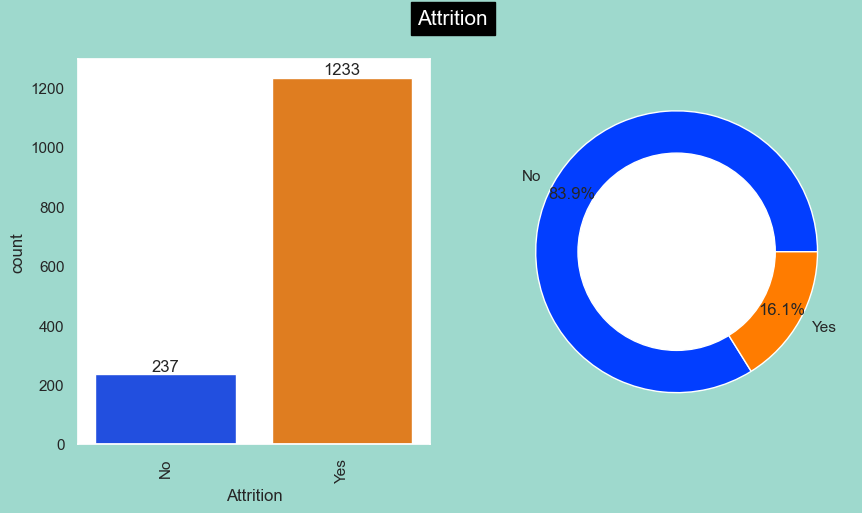

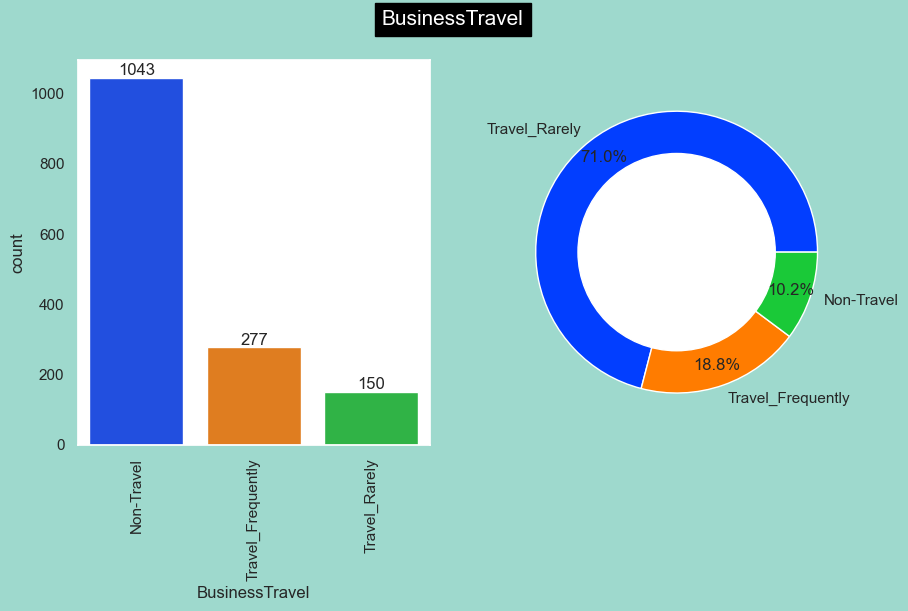

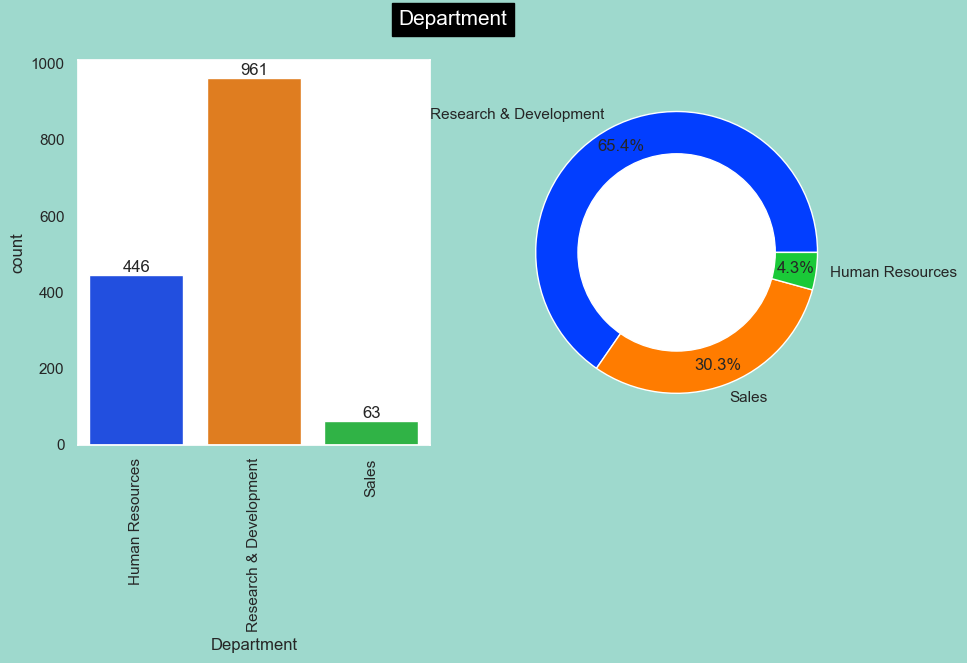

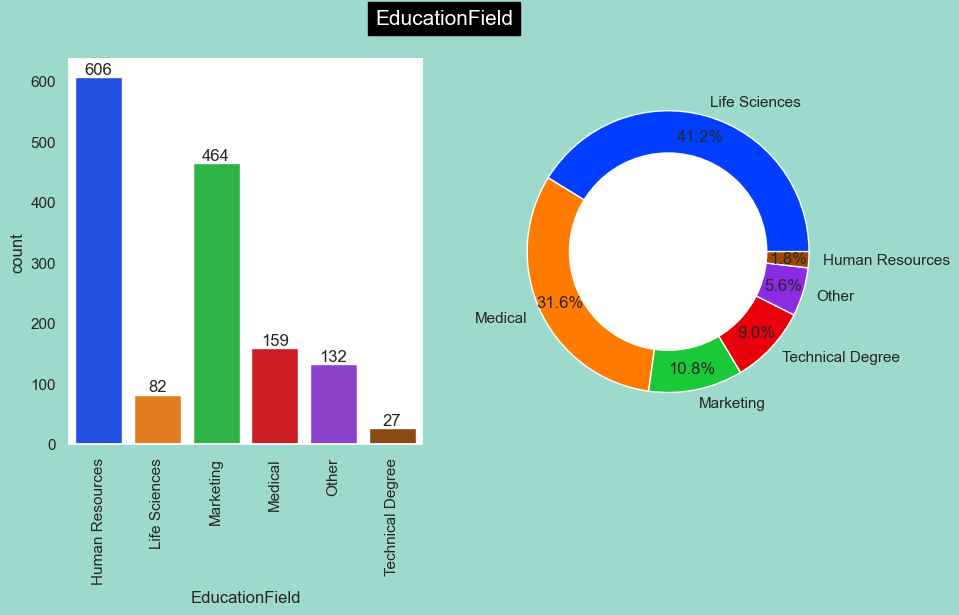

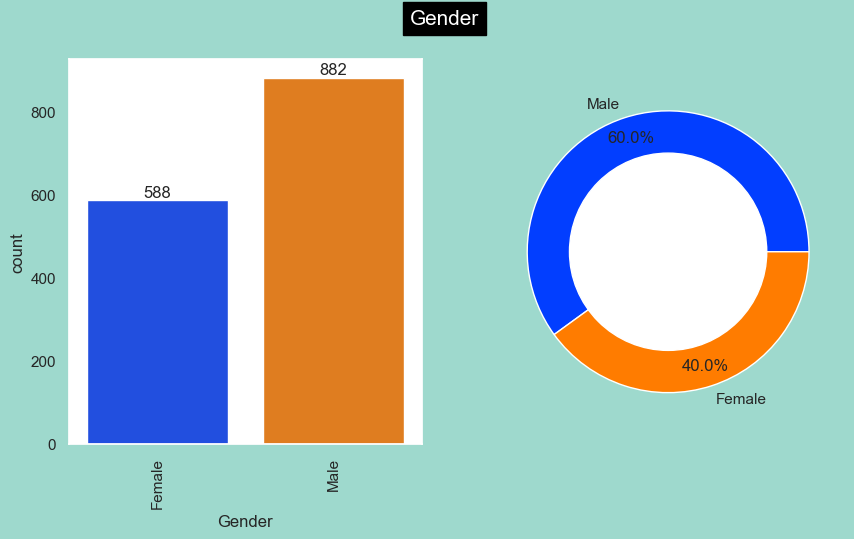

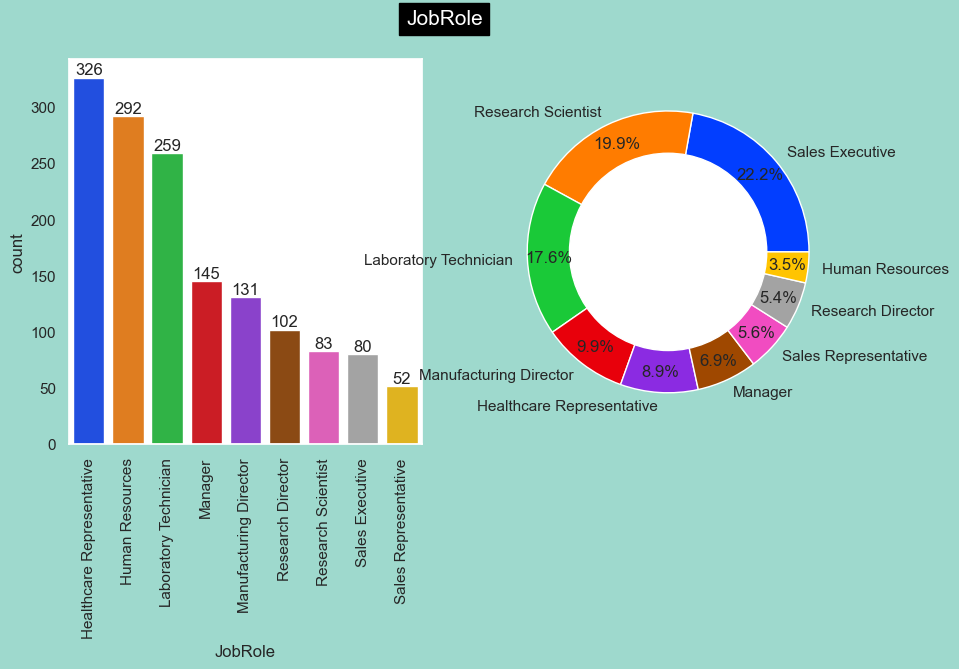

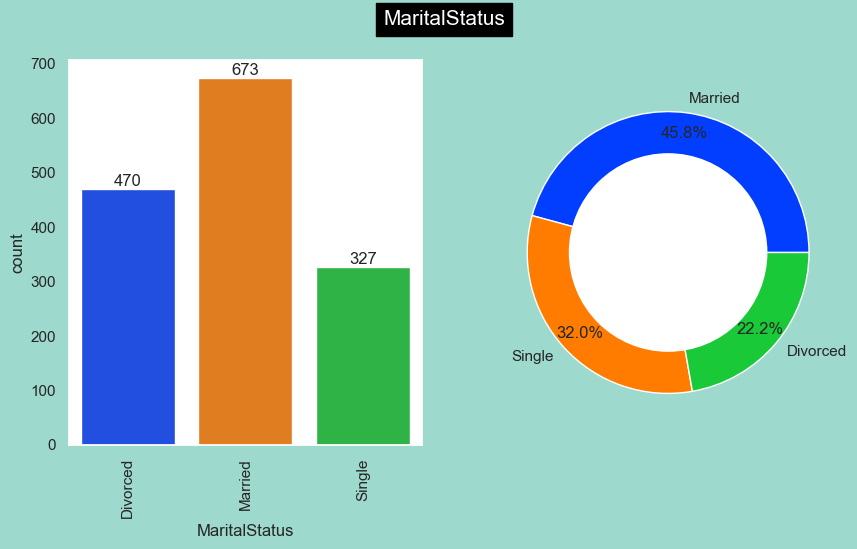

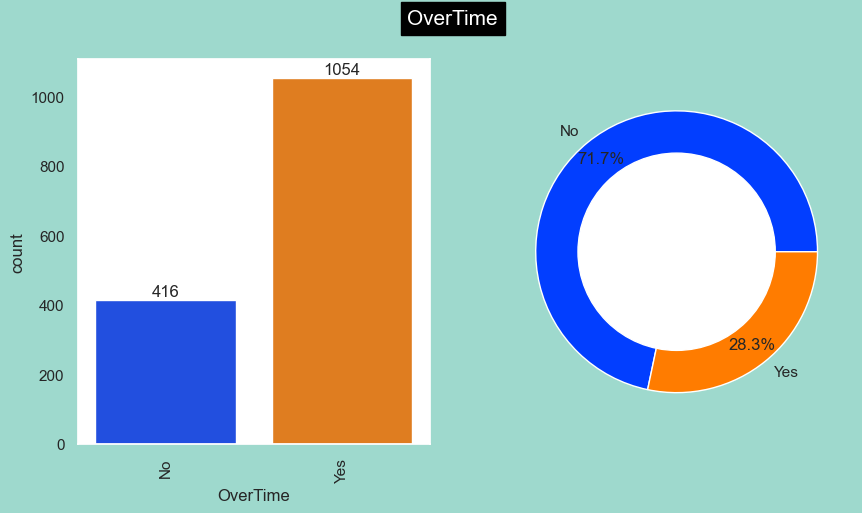

In [25]:
# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("bright")
for i, col in enumerate(obj):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)
    
    ax=sns.countplot(df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)
        
    #count of col (pie chart)
    
    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()

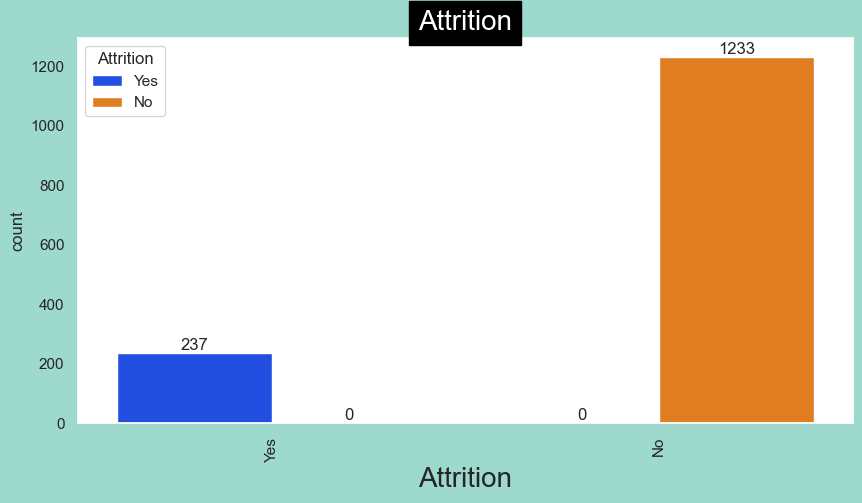

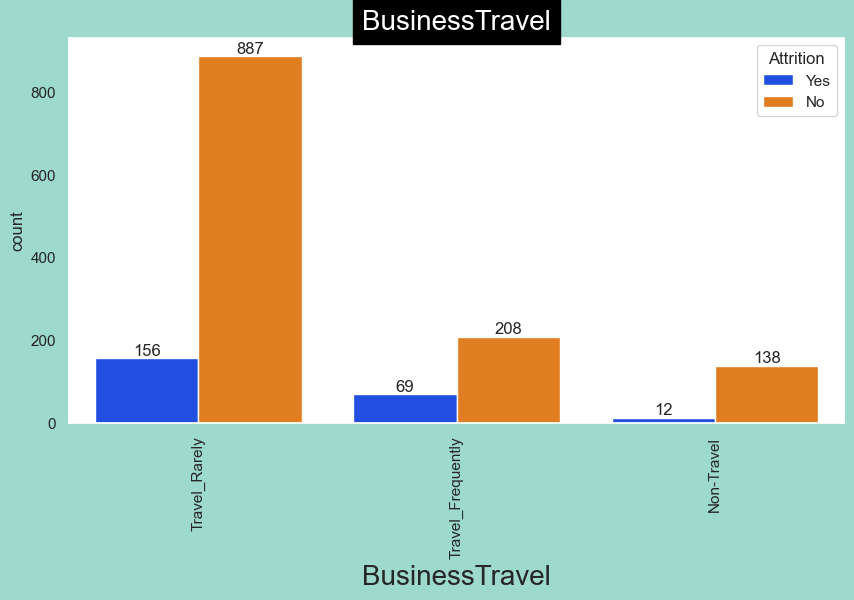

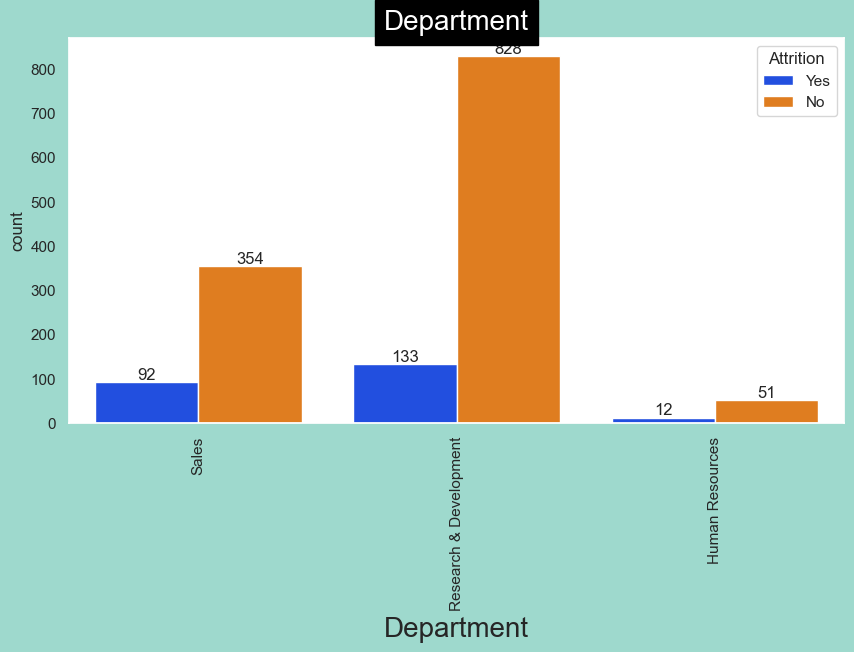

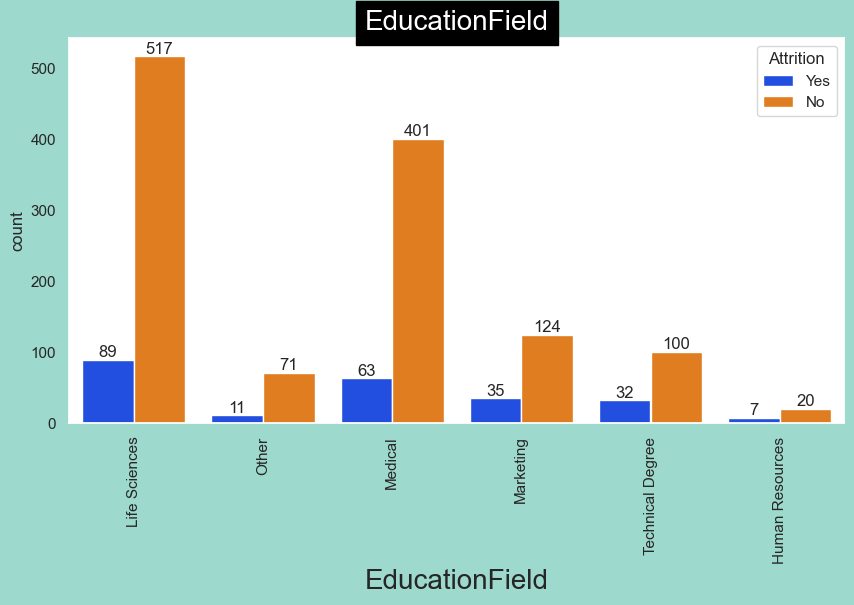

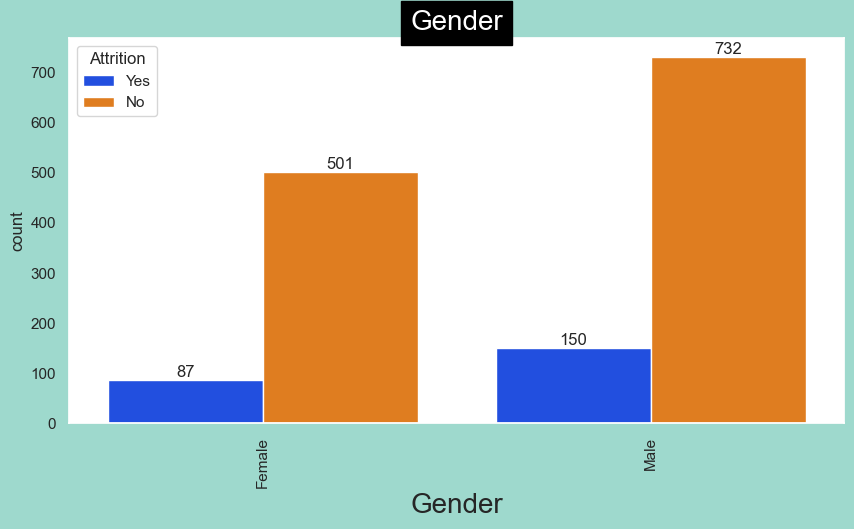

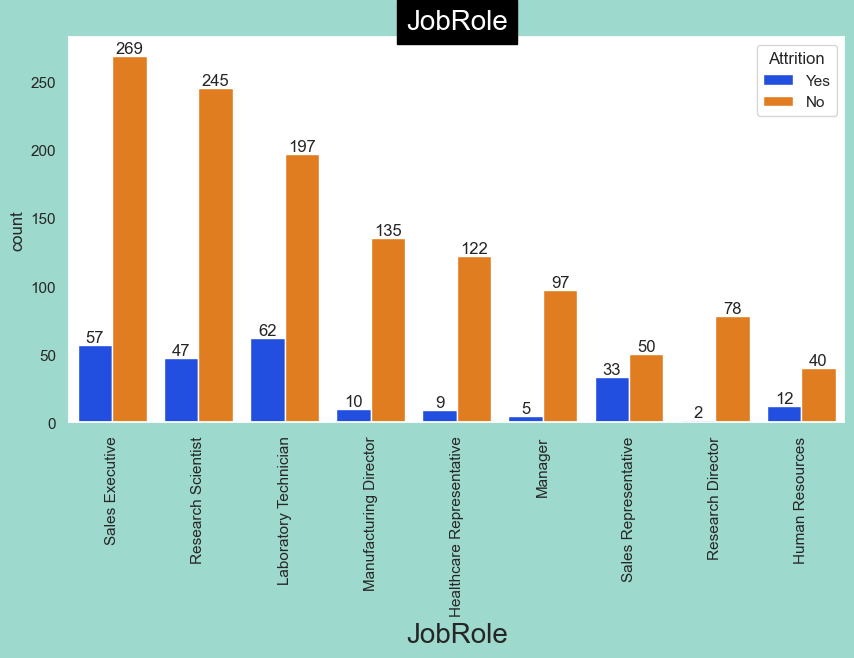

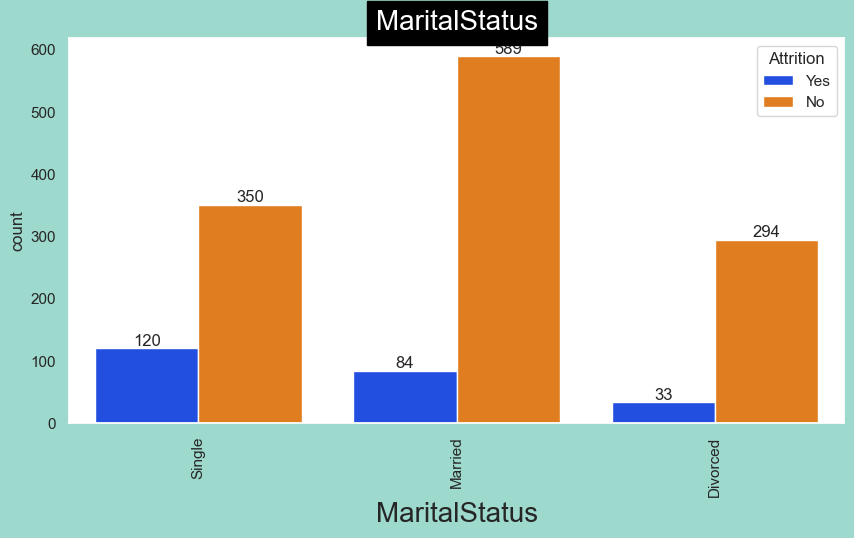

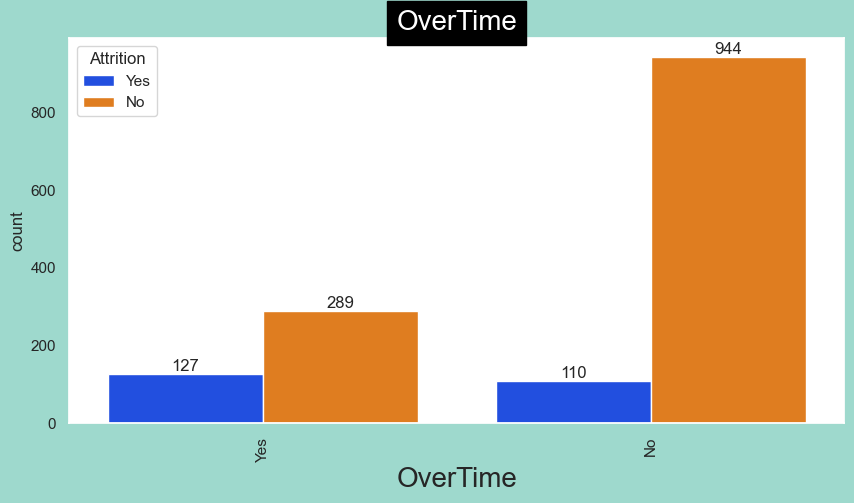

In [27]:
#Calculating attrition for categarical datas

for column in obj : 
    plt.figure(figsize=(10,5))
    
    ax=sns.countplot(x=df[column],data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

**MY observation of attrition in categarical data**
*Overall Employee's attrition in the oraganization rate is 16%. 
*In that 10% attrition noted in travel rarely category and 5% in Travel frequently category.*
*Departmentwise 10% attrition observed in RandD and 7% attrition observed in sales department. Merely no attrition in HR dept.*
*By the field of education 6% attrition noted in Life Science and 4% of attrition noted in Medical Science field.*
*By gender men are having 4to 5% more attrition than women.In female employees attrition rate is 6% and male employees attrition rate is 11%.*
*By job role, Sale's executive and lab technician are facing 4 to 5% of attrition.*
*By married status, Singles has 3 to 4% more attrition than married employees,*
*By overtime worked employees,attrition rate is merely 8% in yes category.*

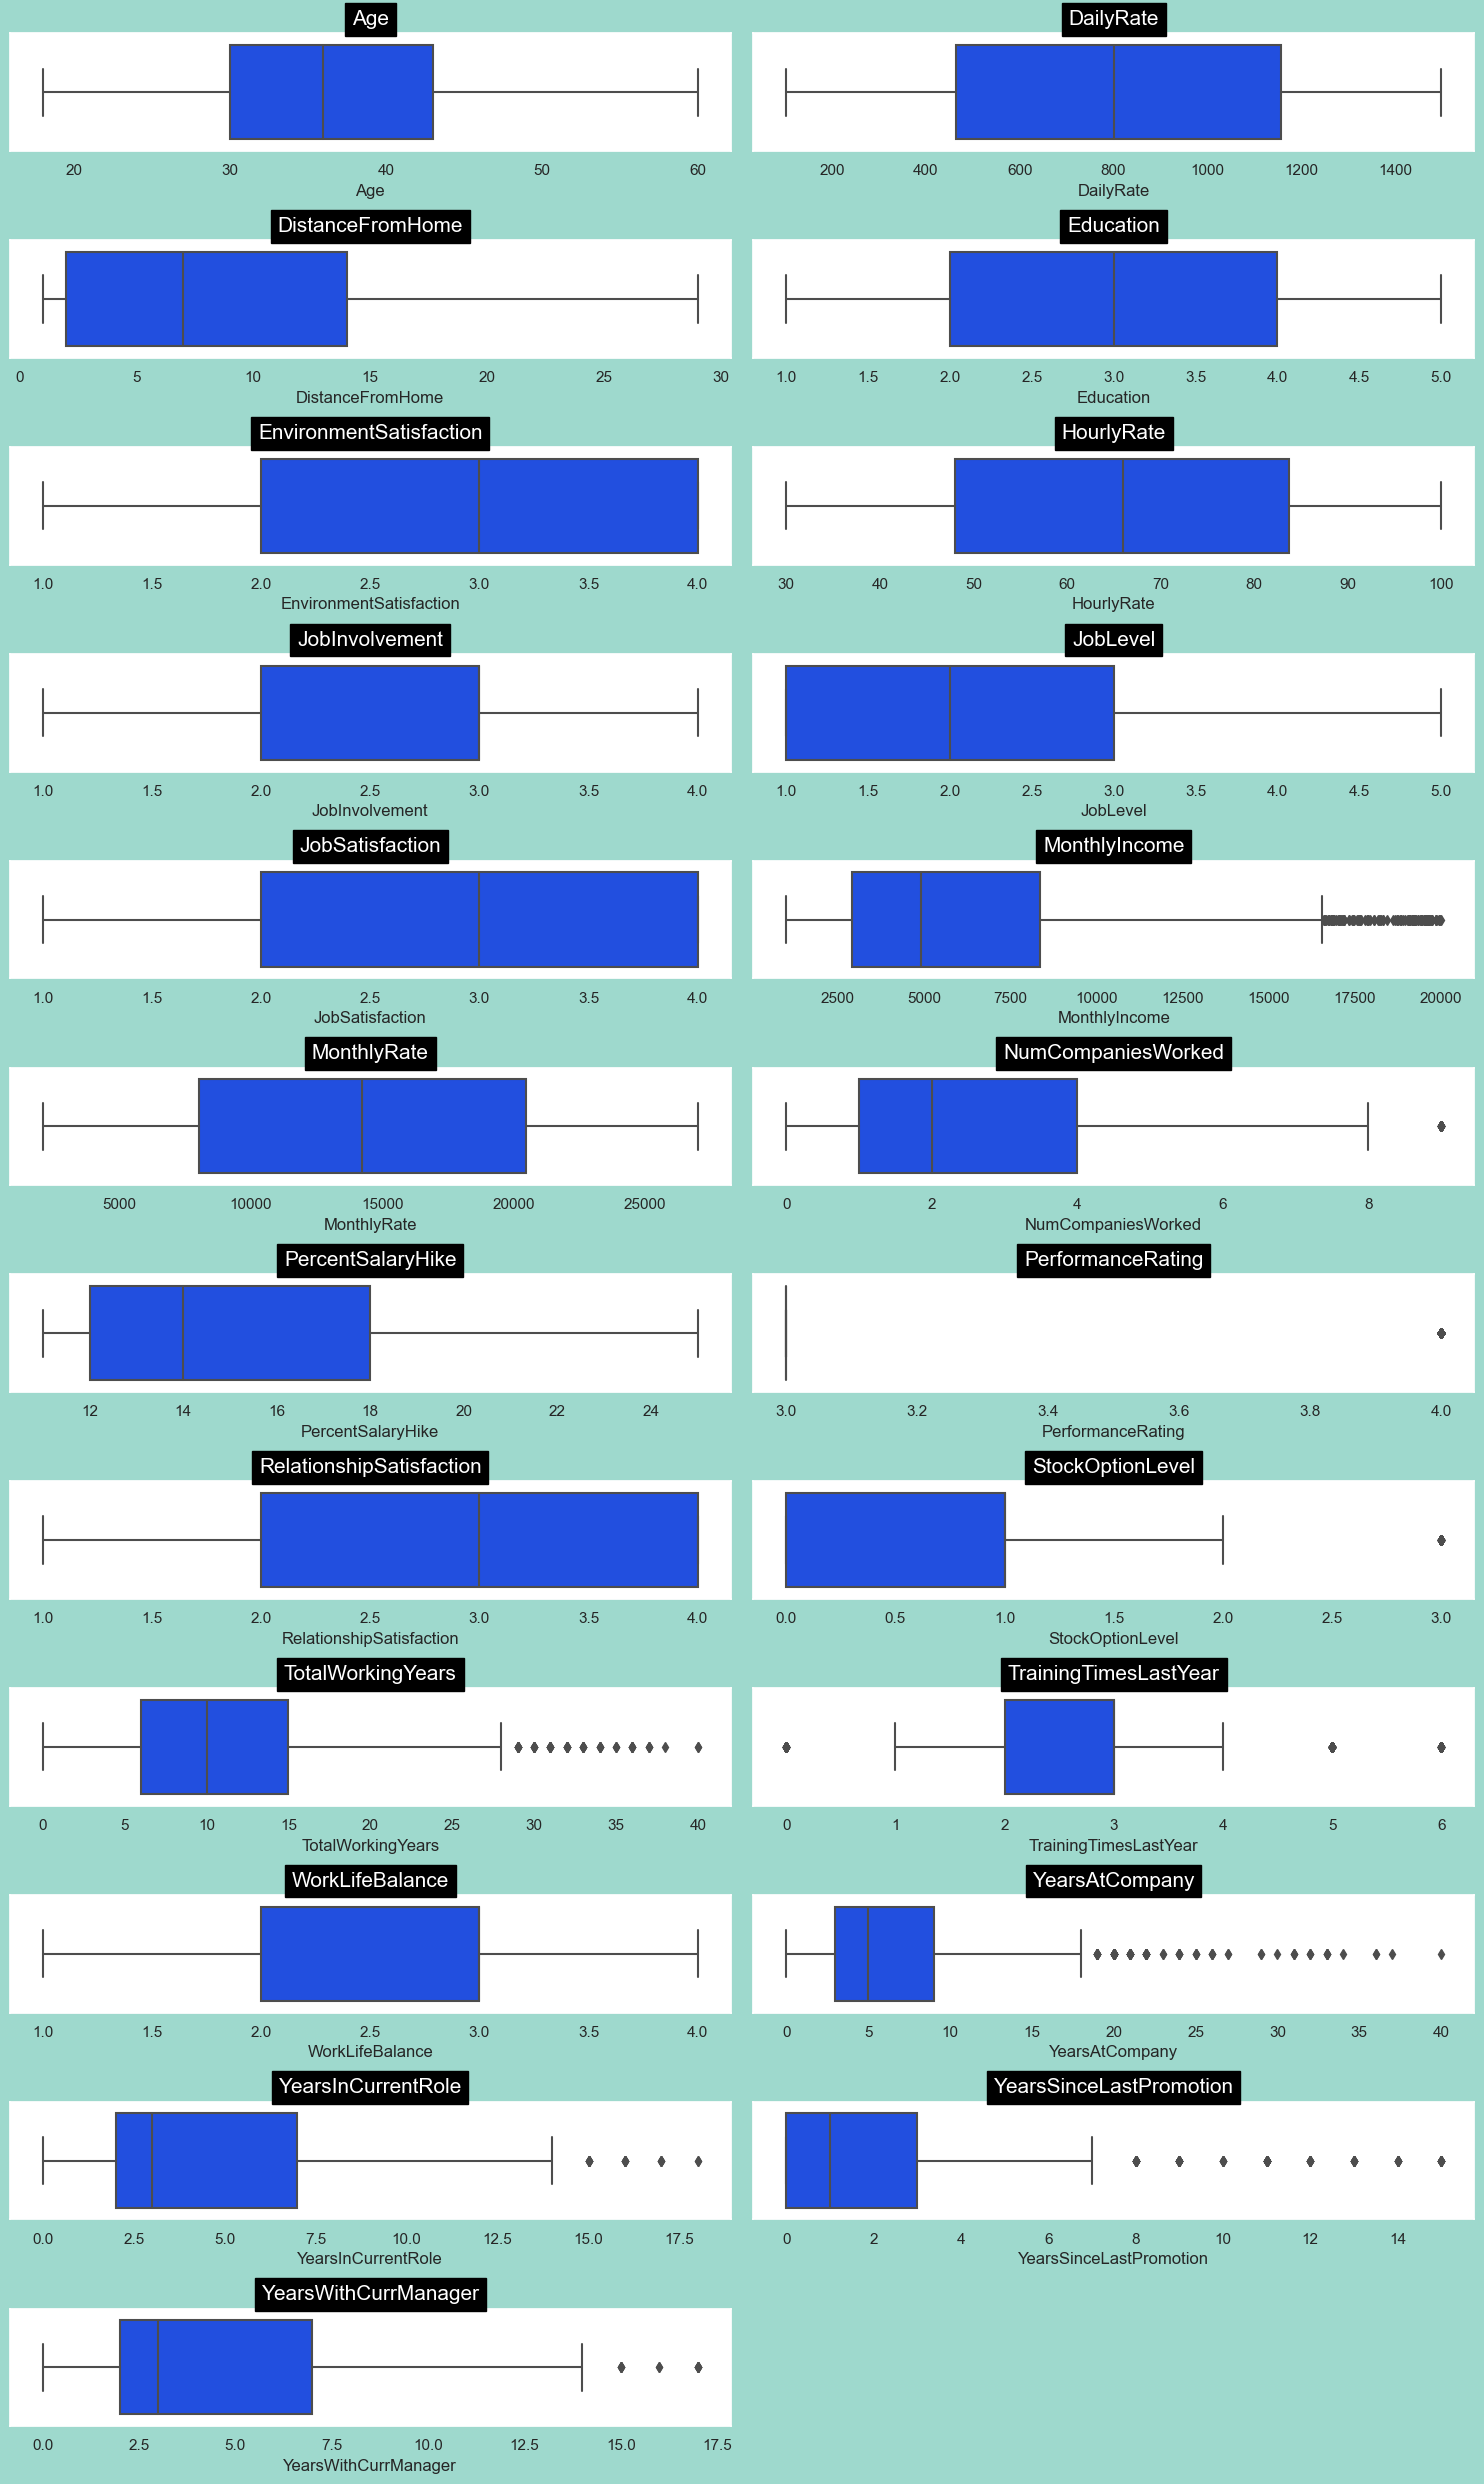

In [28]:
##analyzing numerical data
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

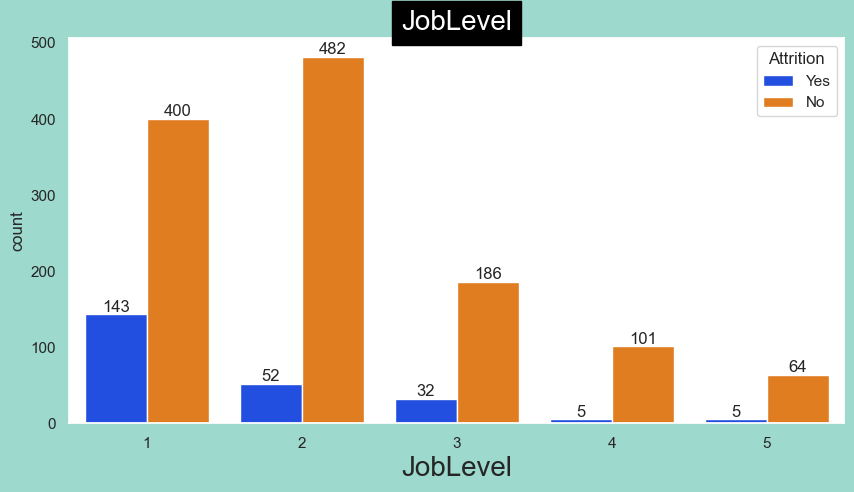

In [29]:
##calculating attrition for numerical data
##pay scale vs attrition rate
plt.figure(figsize=(10,5))

ax = sns.countplot(x=df['JobLevel'], data=df,hue="Attrition")
for container in ax.containers:
        ax.bar_label(container)
plt.title('JobLevel',backgroundcolor='black',color='white',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.grid()
plt.show()

**Employees in the First level(low pay category) are in high in attrition rate(10%).** 
*higher the pay lower the attrition.* 

<Figure size 500x1000 with 0 Axes>

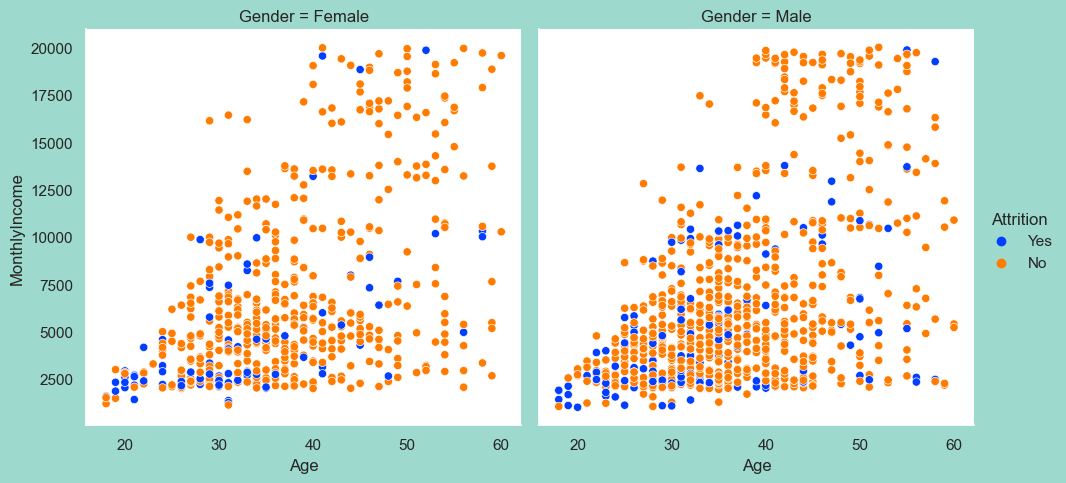

In [30]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

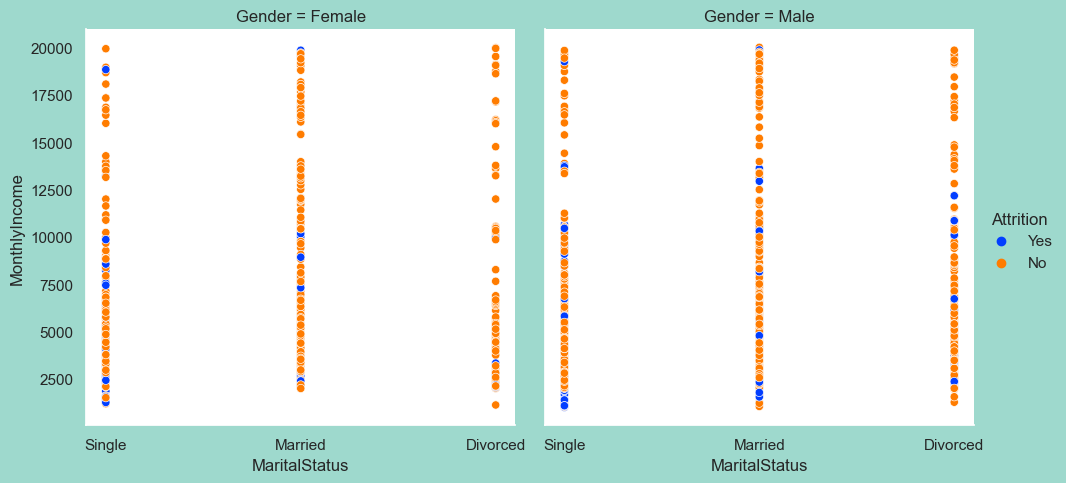

In [31]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

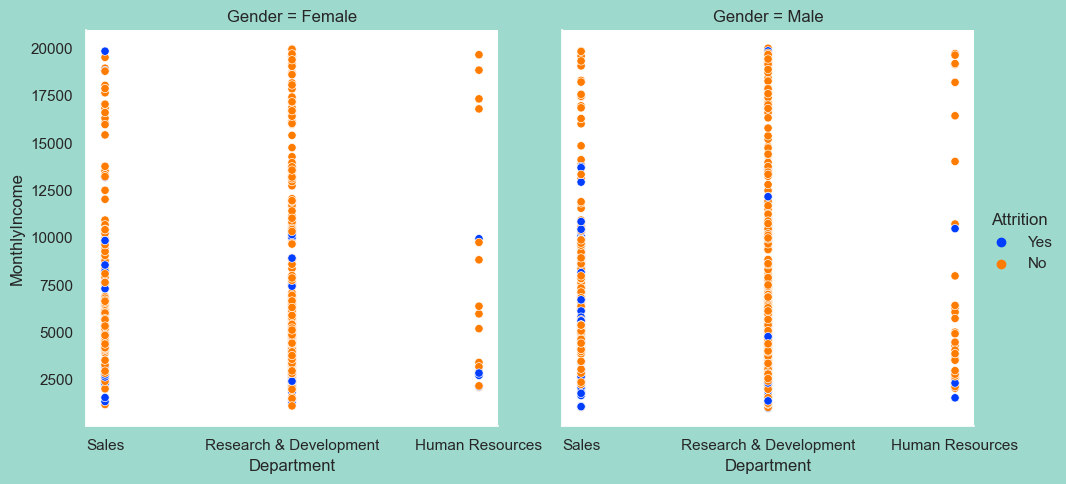

In [32]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

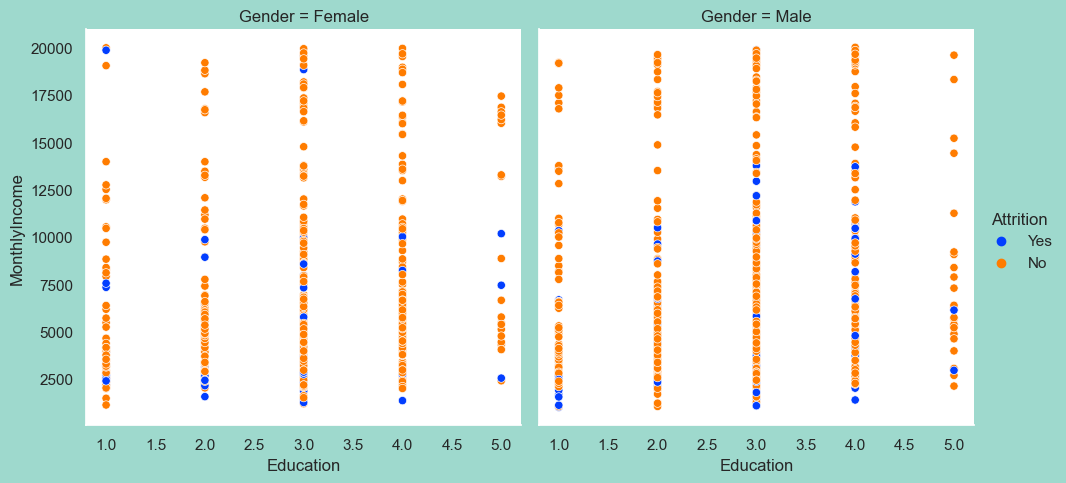

In [33]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

C:\Users\Saleema\AppData\Local\Temp\ipykernel_14184\1303857824.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 500x1000 with 0 Axes>

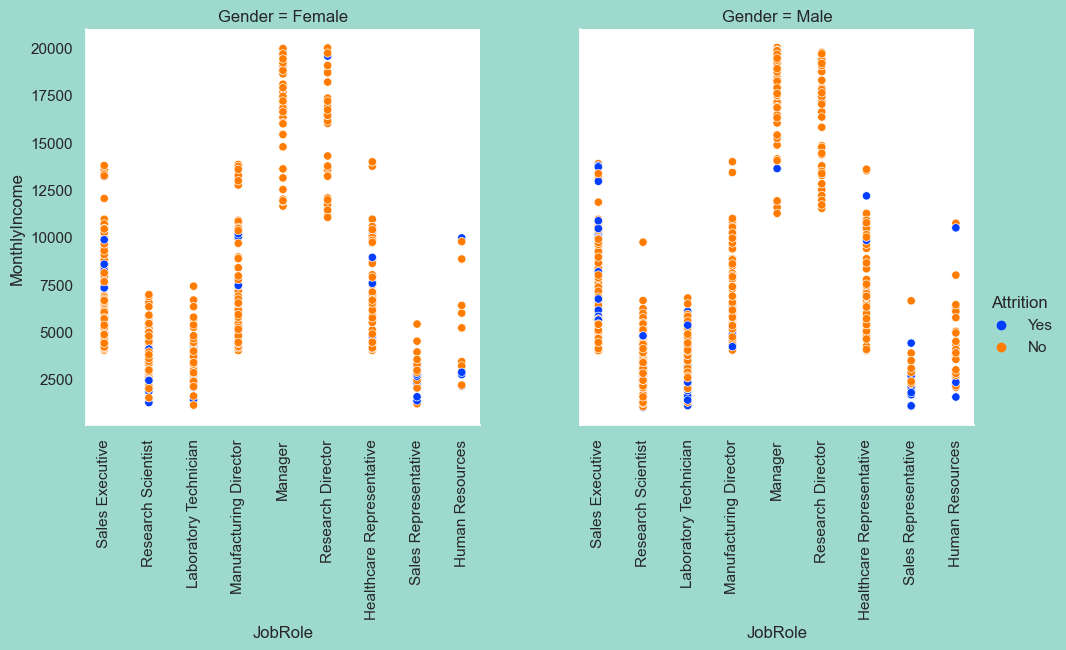

In [34]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

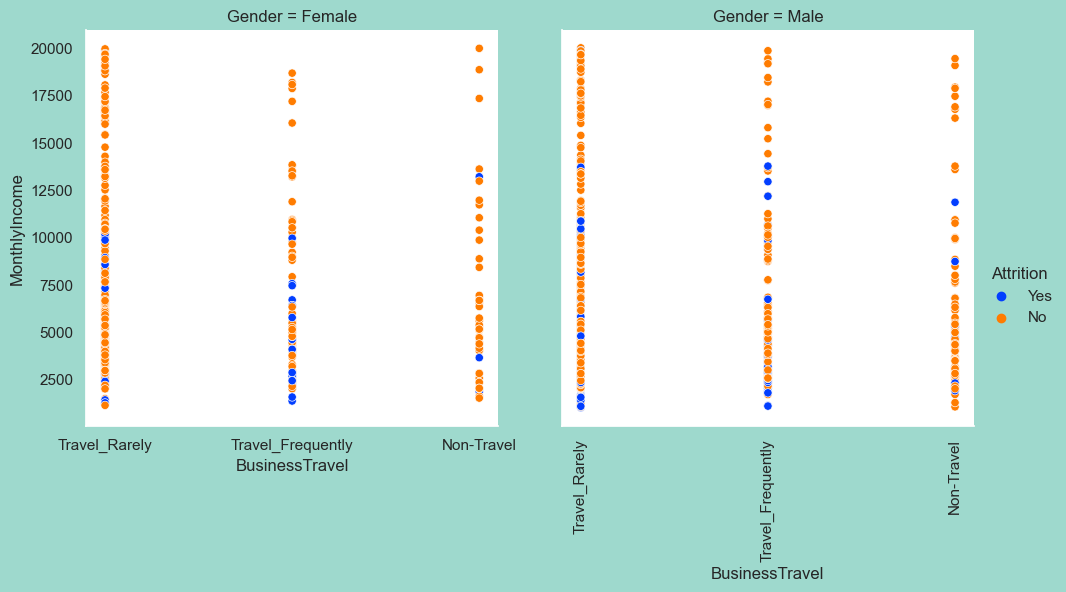

In [35]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

**💡 Analysis of graphs::
1)Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
2)As income increases, attrition decreases.
3)Attrition is much, much less in divorced women.
4)Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
5)Attrition is the highest for those in level 1 jobs.
6)Women with the job position of manager, research director and technician laboratory have almost no attrition.
7)Men with the position of sales expert have a lot of attrition.**

**Machine Learning Models**

In [37]:
DF = df.copy()

In [40]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)
DF

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1102,2,1,2,2,2,3,...,3,1,0,8,0,1,6,4,0,5
1,49,3,3,279,4,8,1,2,3,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,1373,4,2,2,4,4,2,...,3,2,0,7,3,3,0,0,0,0
3,33,3,3,1392,4,3,4,2,4,3,...,3,3,0,8,3,3,8,7,3,0
4,27,3,2,591,4,2,1,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,3,884,4,23,2,3,3,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,3,2,613,4,6,1,3,4,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,3,2,155,4,4,3,2,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,3,3,1023,2,2,3,3,4,2,...,3,4,0,17,3,2,9,6,0,8


In [41]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)
DF

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,41,2,2,1102,2,1,2,2,2,3,...,8,2,11,3,1,0,8,0,1,0
1,49,3,3,279,4,8,1,2,3,2,...,1,3,23,4,4,1,10,3,3,1
2,37,2,2,1373,4,2,2,4,4,2,...,6,2,15,3,2,0,7,3,3,0
3,33,3,3,1392,4,3,4,2,4,3,...,1,2,11,3,3,0,8,3,3,3
4,27,3,2,591,4,2,1,3,1,2,...,9,3,12,3,4,1,6,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,3,884,4,23,2,3,3,2,...,4,3,17,3,3,1,17,3,3,0
1466,39,3,2,613,4,6,1,3,4,2,...,4,3,15,3,1,1,9,5,3,1
1467,27,3,2,155,4,4,3,2,2,2,...,1,2,20,4,2,1,6,0,3,0
1468,49,3,3,1023,2,2,3,3,4,2,...,2,3,14,3,4,0,17,3,2,0


In [42]:
#normalizing ask bala sir
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [43]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

**Problem: Imbalanced Data Distribution**
In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

**SMOTE – Oversampling**
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [44]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

In [45]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

**LogisticRegression**
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.7687074829931972


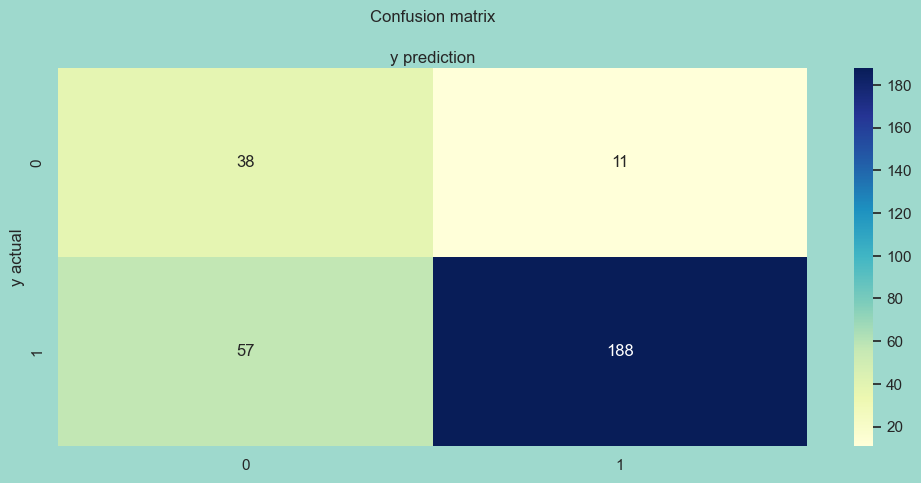

[[ 38  11]
 [ 57 188]]


In [48]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(cm)

**1. RandomForest**
*Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.However, data characteristics can affect their performance.*

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9761904761904762


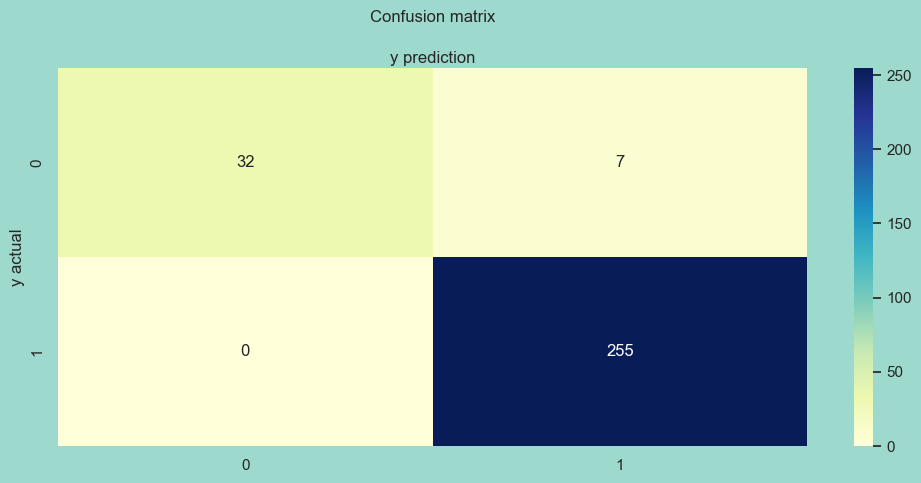

[[ 32   7]
 [  0 255]]


In [55]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(cm)